In [1]:
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import math

from joblib import load
from joblib import dump

In [142]:
# Set default Seaborn style
sns.set()

In [2]:
train_fname = './data/processed/crime_data/fullTrainTestCrimeData_train_weather_by_hourgroup_police_rand_2019_06_27.csv'
valid_fname = './data/processed/crime_data/fullTrainTestCrimeData_valid_weather_by_hourgroup_police_rand_2019_06_27.csv'
tests_fname = './data/processed/crime_data/fullTrainTestCrimeData_tests_weather_by_hourgroup_police_rand_2019_06_27.csv'

In [84]:
df_train = pd.read_csv(train_fname)
df_train = df_train.drop(columns=["Unnamed: 0"])

In [85]:
ind_to_drop_outlier = df_train[df_train["Value"]>60].index
df_train = df_train.drop(ind_to_drop_outlier, axis=0)

In [86]:
df_train["Value_Occ"] = df_train["Value"].apply(lambda x: 1 if x>0 else x)

In [87]:
df_train.head()

,DATE,DAY_OF_MONTH,DAY_OF_WEEK,Hour_Grp,INCIDENT_NUMBER,Lat,Long,MONTH,Value,YEAR,...,DAY_OF_WEEK_NUM,Temperature(F),Dew Point(F),Humidity(%),Wind Speed(mph),Wind Gust(mph),Pressure(in),Precip.(in),Precip Accum(in),Value_Occ
0,2015-06-15,15,Monday,1,[],42.2828,-71.1787,6,0,2015,...,1,56.545455,52.909091,87.454545,9.000000,0.000000,30.100000,0.036364,0.009091,0
1,2015-06-15,15,Monday,2,[],42.2828,-71.1787,6,0,2015,...,1,54.555556,53.500000,95.611111,12.611111,2.444444,30.094444,0.000000,0.000000,0
2,2015-06-15,15,Monday,3,[],42.2828,-71.1787,6,0,2015,...,1,58.111111,53.888889,87.222222,7.444444,0.000000,30.044444,0.000000,0.000000,0
3,2015-06-16,16,Tuesday,1,[],42.2828,-71.1787,6,0,2015,...,2,59.384615,58.000000,95.461538,4.307692,0.000000,29.900000,0.000000,0.023077,0
4,2015-06-16,16,Tuesday,2,[],42.2828,-71.1787,6,0,2015,...,2,64.454545,60.363636,86.181818,4.818182,0.000000,29.800000,0.000000,0.000000,0


In [88]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 787188 entries, 0 to 787190
Data columns (total 22 columns):
DATE                787188 non-null object
DAY_OF_MONTH        787188 non-null int64
DAY_OF_WEEK         787188 non-null object
Hour_Grp            787188 non-null int64
INCIDENT_NUMBER     787188 non-null object
Lat                 787188 non-null float64
Long                787188 non-null float64
MONTH               787188 non-null int64
Value               787188 non-null int64
YEAR                787188 non-null int64
closest_mbta_d      787188 non-null float64
closest_police_d    787188 non-null float64
DAY_OF_WEEK_NUM     787188 non-null int64
Temperature(F)      787188 non-null float64
Dew Point(F)        787188 non-null float64
Humidity(%)         787188 non-null float64
Wind Speed(mph)     787188 non-null float64
Wind Gust(mph)      787188 non-null float64
Pressure(in)        787188 non-null float64
Precip.(in)         787188 non-null float64
Precip Accum(in)    7871

In [89]:
df_train.describe()

,DAY_OF_MONTH,Hour_Grp,Lat,Long,MONTH,Value,YEAR,closest_mbta_d,closest_police_d,DAY_OF_WEEK_NUM,Temperature(F),Dew Point(F),Humidity(%),Wind Speed(mph),Wind Gust(mph),Pressure(in),Precip.(in),Precip Accum(in),Value_Occ
count,787188.000000,787188.000000,787188.000000,787188.000000,787188.000000,787188.000000,787188.000000,787188.000000,787188.000000,787188.00000,787188.000000,787188.000000,787188.000000,787188.000000,787188.000000,787188.000000,787188.000000,787188.000000,787188.000000
mean,15.844254,2.000000,42.315382,-71.091964,6.649377,0.407156,2016.337905,1.115050,1.159266,3.99705,52.736798,41.081908,67.528595,11.126264,5.124887,29.986824,0.003498,0.003033,0.262653
std,8.795231,0.816499,0.038536,0.047257,3.534424,0.840260,0.889831,1.083906,0.760291,1.99877,17.454508,18.624141,17.975232,4.569705,8.291179,0.285560,0.015738,0.015302,0.440076
min,1.000000,1.000000,42.232400,-71.178700,1.000000,0.000000,2015.000000,0.059023,0.018037,1.00000,-4.500000,-20.875000,17.375000,1.375000,0.000000,26.162500,0.000000,0.000000,0.000000
25%,8.000000,1.000000,42.282800,-71.128300,3.000000,0.000000,2016.000000,0.297320,0.658992,2.00000,39.000000,27.875000,54.000000,7.800000,0.000000,29.850000,0.000000,0.000000,0.000000
50%,16.000000,2.000000,42.311600,-71.092300,7.000000,0.000000,2016.000000,0.707403,1.042969,4.00000,52.857143,43.000000,67.250000,10.571429,0.000000,29.987500,0.000000,0.000000,0.000000
75%,23.000000,3.000000,42.347600,-71.056300,10.000000,1.000000,2017.000000,1.538184,1.448316,6.00000,67.800000,56.555556,82.625000,13.727273,7.250000,30.150000,0.000000,0.000000,1.000000
max,31.000000,3.000000,42.390800,-70.962700,12.000000,12.000000,2018.000000,4.554553,6.092498,7.00000,93.875000,75.142857,100.000000,42.181818,56.363636,30.812500,0.293333,0.233333,1.000000


In [145]:
def plot_histogram(data, edge_bins, col_name):
    bins = (edge_bins[:-1] + edge_bins[1:])/2
    bin_widths =  edge_bins[1:] - edge_bins[:-1]
    #print (data)
    #print (bins)
    plt.bar(bins, data, width = bin_widths, alpha = 0.5)
    if col_name == 'Lat':
        plt.legend(['0','1'])
    plt.ylabel('PDF')
    plt.xlabel(col_name)
    #plt.yscale('log')
    #plt.legend(Gender,loc=2)

def plot_norm_hist_sig_bgd(df_train, col_name):
    con_bgd = df_train["Value_Occ"]==0
    con_sig = df_train["Value_Occ"]==1
    sig_hist, sig_bins = np.histogram(df_train[con_sig][col_name], density=True)
    bgd_hist, bgd_bins = np.histogram(df_train[con_bgd][col_name], density=True)
    plot_histogram(bgd_hist, bgd_bins, col_name)
    plot_histogram(sig_hist, sig_bins, col_name)

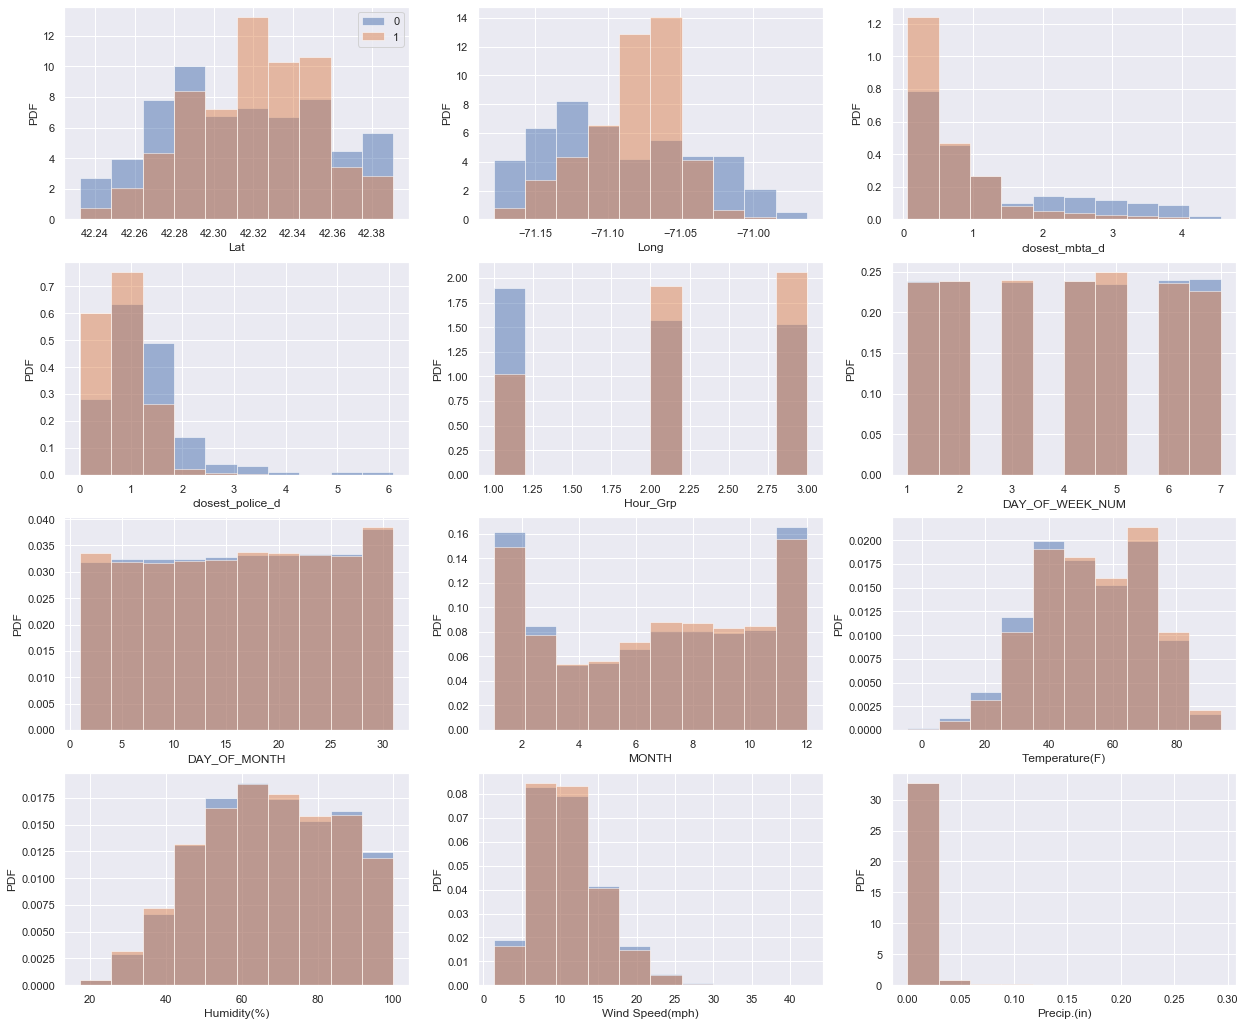

In [146]:
features = ['Lat', 'Long', 'closest_mbta_d', 'closest_police_d', 'Hour_Grp', 
            'DAY_OF_WEEK_NUM', 'DAY_OF_MONTH', 'MONTH', 
            'Temperature(F)', 'Humidity(%)', 'Wind Speed(mph)', 'Precip.(in)']

_ = plt.figure(figsize = (21, 18))
for i, fea in enumerate(features):
    _ = plt.subplot(4,3,i+1)
    _ = plot_norm_hist_sig_bgd(df_train, fea)


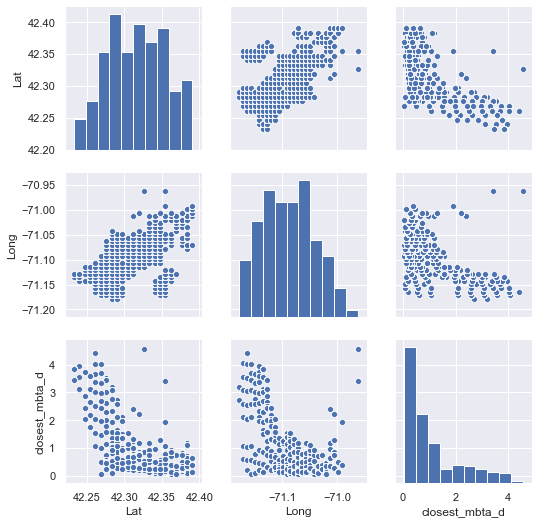

In [148]:
sns.pairplot(df_train[features[:3]])

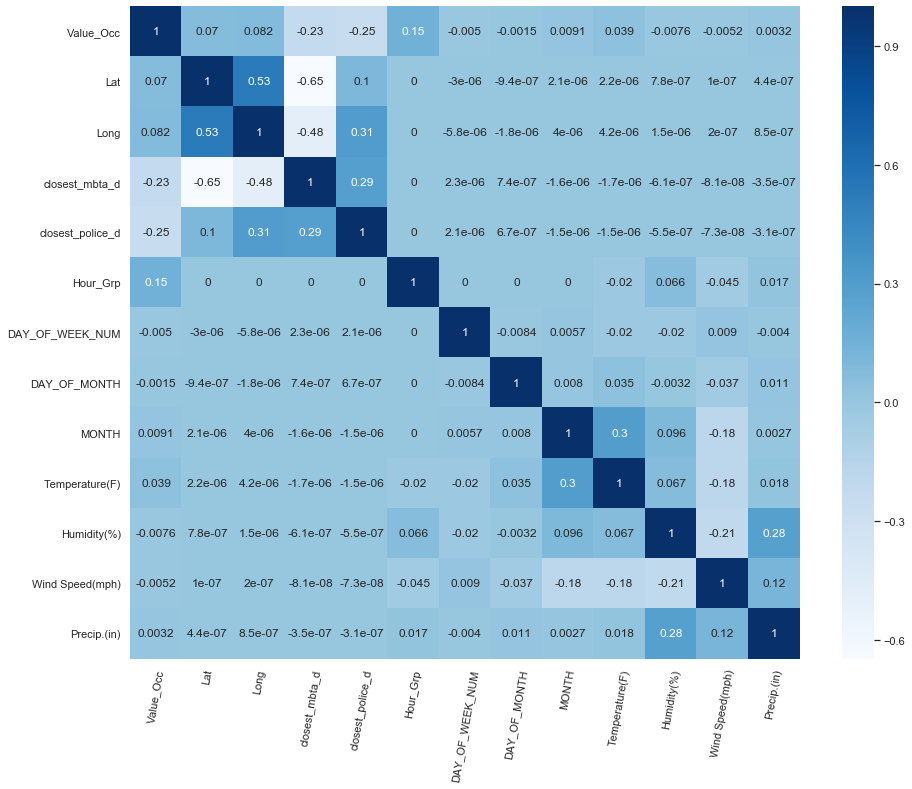

In [152]:
fig = plt.figure(figsize=(15, 12))
sns.heatmap(df_train[['Value_Occ'] + features].corr(), cmap='Blues', annot=True)
plt.xticks(rotation=80)
plt.show()

In [ ]:
df_train = pd.read_csv(train_fname)
df_train = df_train.drop(columns=["Unnamed: 0"])

#df_train.boxplot(column="Value")
# remove outliers
ind_to_drop_outlier = df_train[df_train["Value"]>60].index
df_train = df_train.drop(ind_to_drop_outlier, axis=0)

df_valid = pd.read_csv(valid_fname)
df_valid = df_valid.drop(columns=["Unnamed: 0"])

df_test = pd.read_csv(tests_fname)
df_test = df_test.drop(columns=["Unnamed: 0"])

#df_uniq_id["DATE"] = df_uniq_id["OCCURRED_ON_DATE"].apply(lambda x: x.split(" ")[0])
df_train["Value_Occ"] = df_train["Value"].apply(lambda x: 1 if x>0 else x)
df_valid["Value_Occ"] = df_valid["Value"].apply(lambda x: 1 if x>0 else x)
df_test["Value_Occ"]  = df_test["Value"].apply(lambda x: 1 if x>0 else x)